In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

from models import *
from utils import *
from data import *

In [20]:
ts = Temperatures(path=None, normalize=True)
data = ts.data
X_train, y_train, X_val, y_val, X_test, y_test = windowing(data, 30)

In [21]:
forecasters = {
    "LinearRegression": LinearRegressionForecaster(),
    "RandomForest": RandomForestForecaster(),
}

for name, model in forecasters.items():
    print(f"→ Training {name}…")
    model.fit(X_train, y_train)

→ Training LinearRegression…
→ Training RandomForest…


Model: LinearRegression
 → Predicted 882 points. First 10 preds: [1.0170595  0.75926524 0.77509378 0.89856026 0.16546994 0.46575381
 0.65268358 0.67746457 0.33311755 0.96138582]


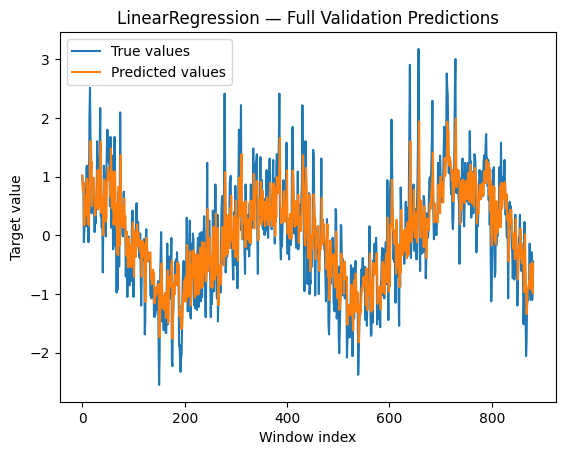

Model: RandomForest
 → Predicted 882 points. First 10 preds: [1.02455432 0.81086227 0.82363466 0.73201727 0.45691944 0.66275156
 0.68043642 0.79808987 0.57752036 1.07687203]


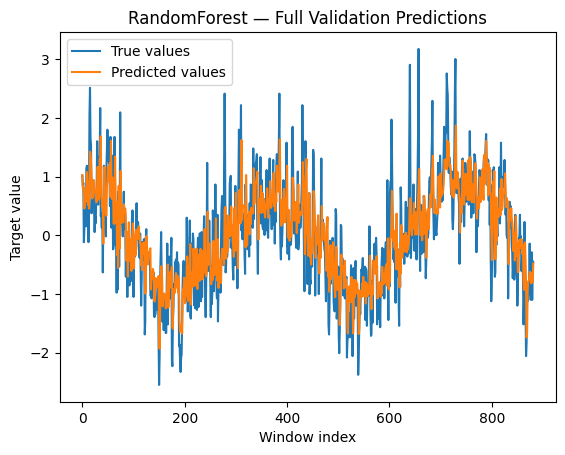

In [22]:
for name, model in forecasters.items():
    # 1) full-series prediction
    y_preds = np.array([model.predict(window) for window in X_val])
    
    # 2) print info so you know which is which
    print(f"Model: {name}")
    print(f" → Predicted {len(y_preds)} points. First 10 preds: {y_preds[:10]}")
    
    # 3) plot true vs predicted over all windows
    plt.figure()
    plt.plot(y_val,    label="True values")
    plt.plot(y_preds,  label="Predicted values")
    plt.title(f"{name} — Full Validation Predictions")
    plt.xlabel("Window index")
    plt.ylabel("Target value")
    plt.legend()
    plt.show()